
--- N = 100 ---


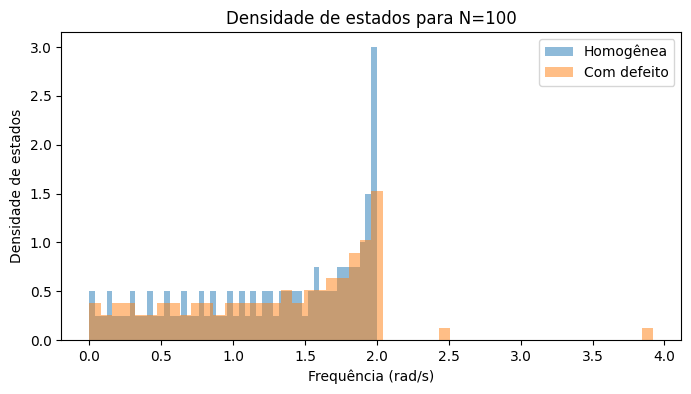

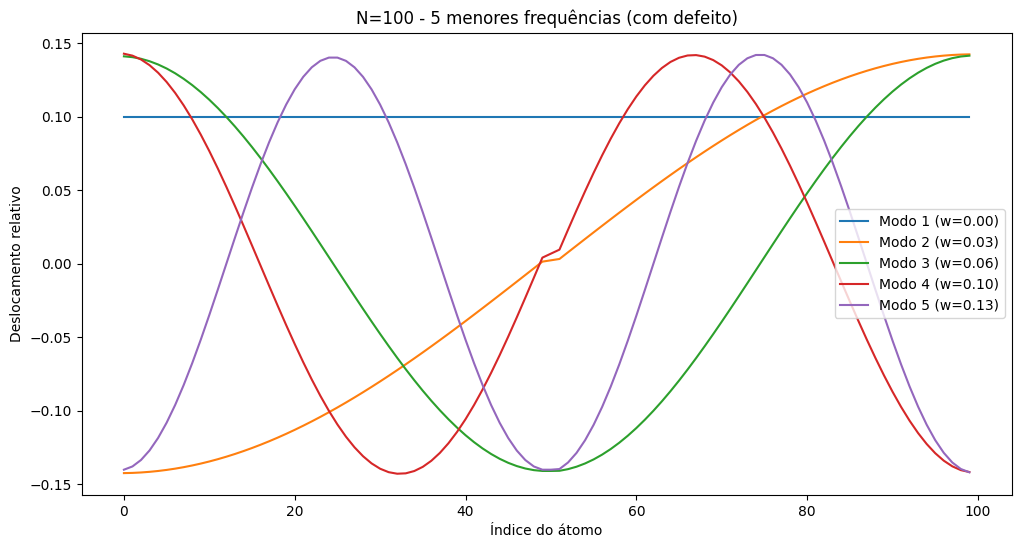

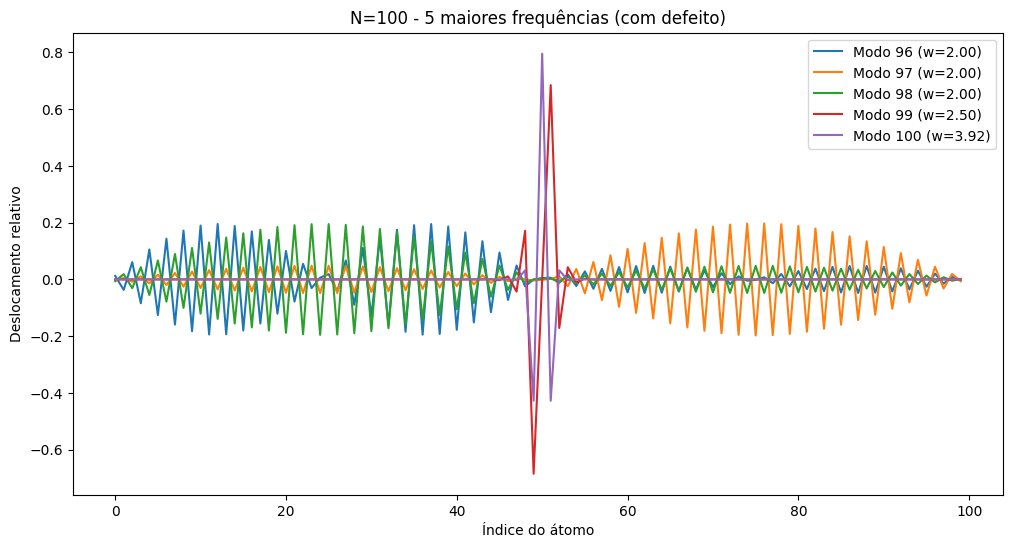


--- N = 1000 ---


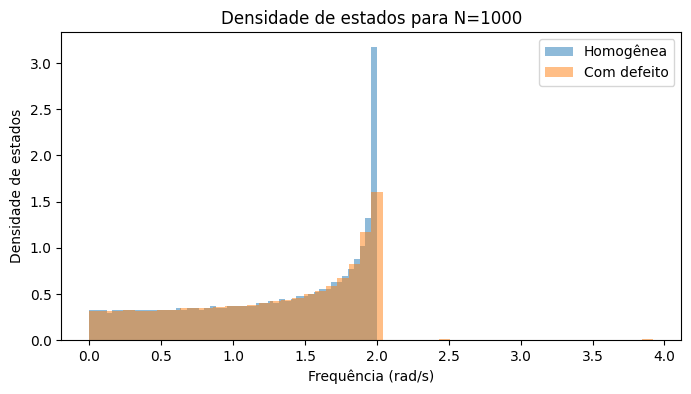

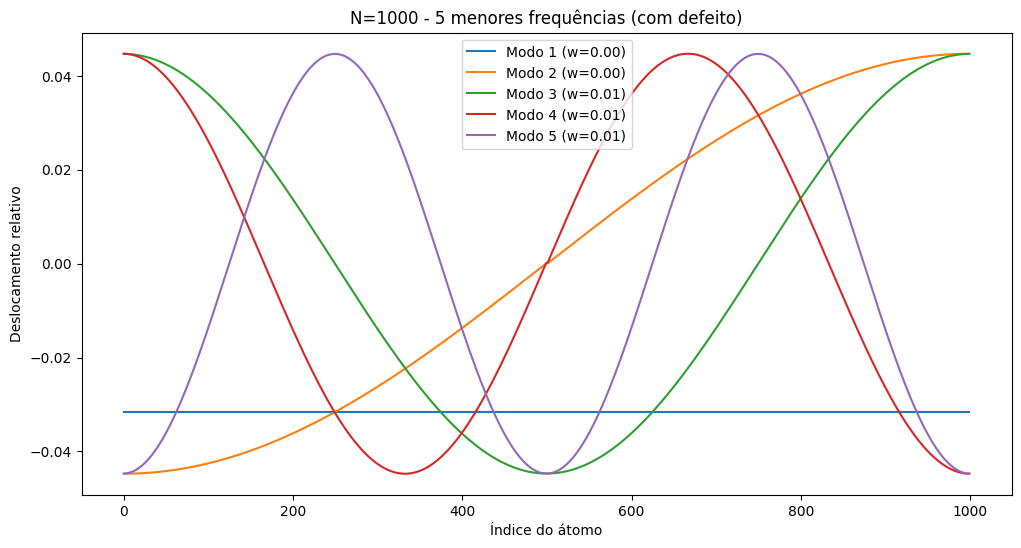

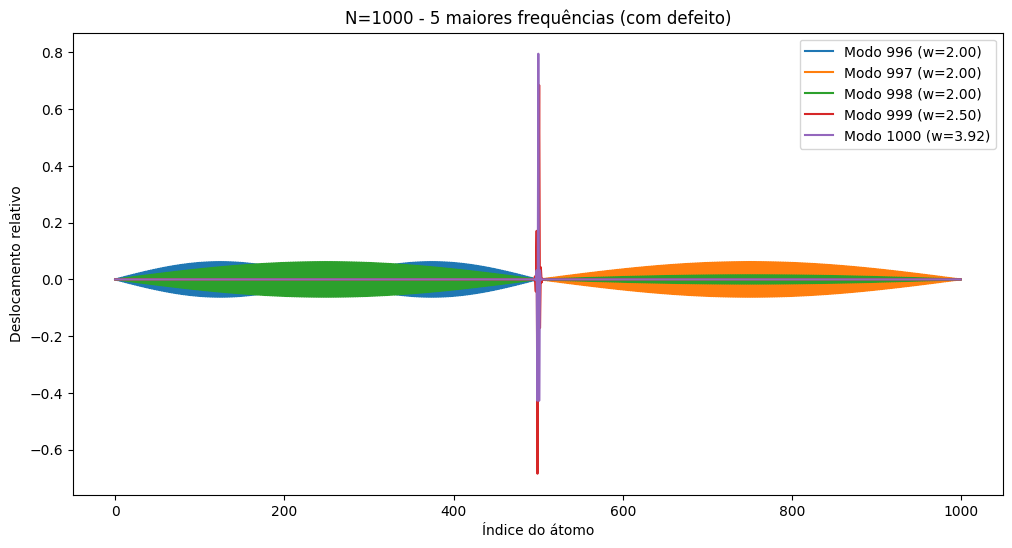


--- N = 10000 ---


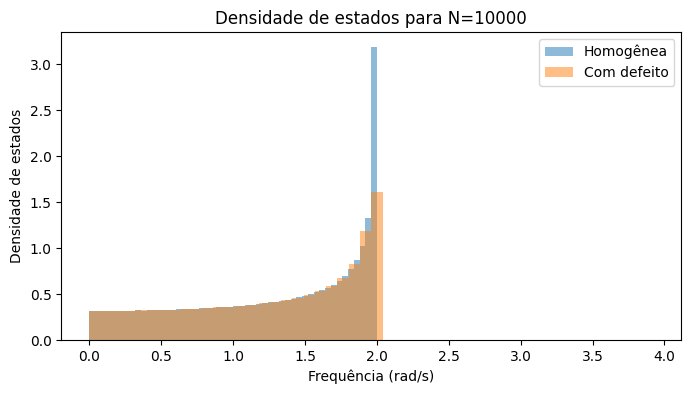

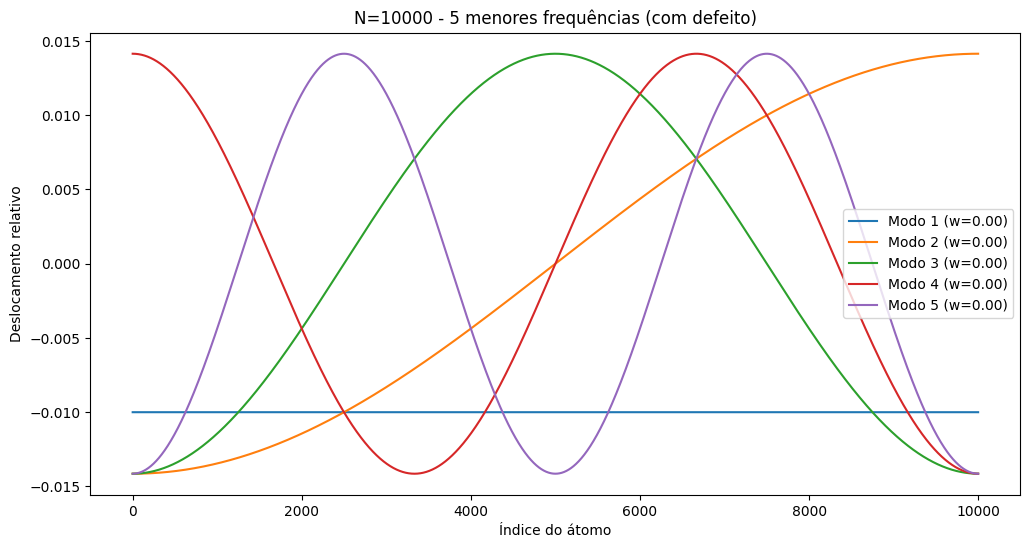

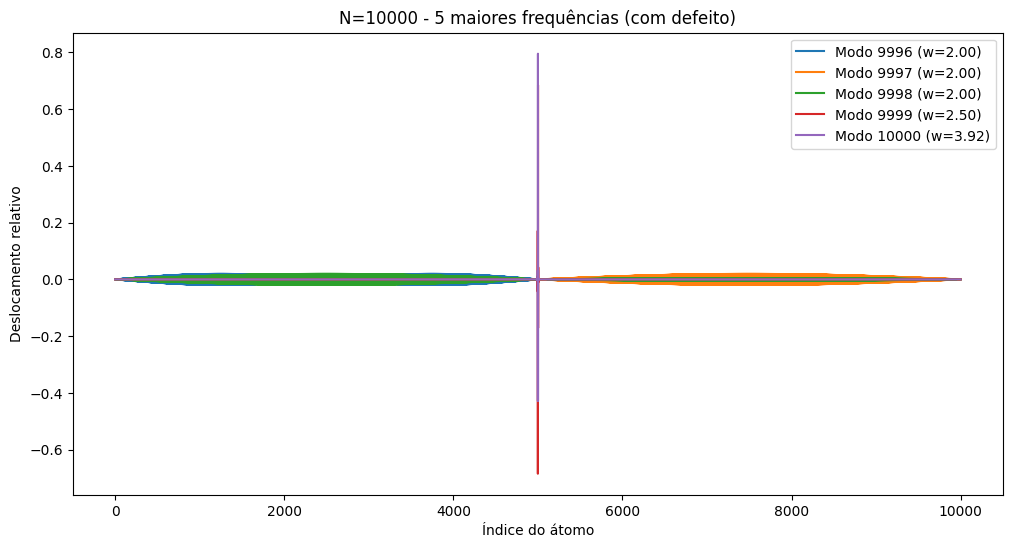

In [1]:
# --- Simulação de cadeia unidimensional de átomos acoplados por molas ---

import numpy as np
import matplotlib.pyplot as plt

def montar_matriz_dinamica(N, k=1.0, m=1.0, k2=None):
    """
    Monta a matriz dinâmica para uma cadeia de N massas acopladas por molas.
    Se k2 for fornecido, substitui as duas molas centrais por k2.
    """
    D = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            D[i, i] += k
            D[i, i-1] -= k
        if i < N-1:
            D[i, i] += k
            D[i, i+1] -= k

    # Defeito de mola no centro, se especificado
    if k2 is not None:
        c = N // 2
        # Substitui as duas molas centrais por k2
        for (a, b) in [(c-1, c), (c, c+1)]:
            D[a, a] += (k2 - k)
            D[a, b] -= (k2 - k)
            D[b, b] += (k2 - k)
            D[b, a] -= (k2 - k)
    return D / m

def calcular_frequencias(D):
    """
    Calcula as frequências naturais (rad/s) e modos normais.
    """
    w2, modos = np.linalg.eigh(D)
    w = np.sqrt(np.clip(w2, 0, None))
    return w, modos

def plotar_densidade_de_estados(w, N, label):
    """
    Plota o histograma (densidade de estados) das frequências.
    """
    plt.hist(w, bins=50, density=True, alpha=0.5, label=label)
    plt.xlabel('Frequência (rad/s)')
    plt.ylabel('Densidade de estados')
    plt.title(f'Densidade de estados para N={N}')
    plt.legend()

def plotar_modos_normais(modos, N, w, indices, titulo):
    """
    Plota os modos normais para os índices fornecidos.
    """
    x = np.arange(N)
    plt.figure(figsize=(12, 6))
    for idx in indices:
        plt.plot(x, modos[:, idx], label=f'Modo {idx+1} (w={w[idx]:.2f})')
    plt.xlabel('Índice do átomo')
    plt.ylabel('Deslocamento relativo')
    plt.title(titulo)
    plt.legend()
    plt.show()

# Parâmetros
massas = 1.0
k = 1.0
k2 = 5.0
Ns = [100, 1000, 10000]

for N in Ns:
    print(f"\n--- N = {N} ---")
    # Cadeia homogênea
    D_hom = montar_matriz_dinamica(N, k, massas)
    w_hom, modos_hom = calcular_frequencias(D_hom)
    
    # Cadeia com defeito de mola
    D_def = montar_matriz_dinamica(N, k, massas, k2=k2)
    w_def, modos_def = calcular_frequencias(D_def)
    
    # Densidade de estados
    plt.figure(figsize=(8, 4))
    plotar_densidade_de_estados(w_hom, N, 'Homogênea')
    plotar_densidade_de_estados(w_def, N, 'Com defeito')
    plt.show()
    
    # Modos normais: 5 menores e 5 maiores frequências
    idxs_baixas = np.argsort(w_def)[:5]
    idxs_altas = np.argsort(w_def)[-5:]
    
    plotar_modos_normais(modos_def, N, w_def, idxs_baixas, f'N={N} - 5 menores frequências (com defeito)')
    plotar_modos_normais(modos_def, N, w_def, idxs_altas, f'N={N} - 5 maiores frequências (com defeito)')



Collecting workspace informationA análise do código em AV5.ipynb mostra como o tamanho da cadeia (`N`) e a presença do defeito de mola (`k2`) afetam as propriedades vibracionais do sistema:

### 1. Distribuição das frequências (densidade de estados)
- **Tamanho da cadeia (`N`)**:  
  À medida que `N` aumenta, a densidade de estados se torna mais "suave" e contínua, pois há mais modos normais possíveis. Para `N` pequeno, os picos são mais espaçados; para `N` grande, a distribuição se aproxima do limite contínuo.
- **Defeito de mola (`k2`)**:  
  A introdução do defeito altera a matriz dinâmica, criando modos localizados e/ou mudando a distribuição das frequências. Normalmente, aparecem frequências fora da banda principal (gap ou estados localizados), visíveis como picos adicionais ou deslocados no histograma da densidade de estados.

### 2. Padrões de deslocamento dos modos normais
- **Cadeia homogênea**:  
  Os modos normais são ondas estacionárias distribuídas por toda a cadeia, com simetria e periodicidade bem definidas.
- **Com defeito**:  
  Alguns modos permanecem semelhantes aos homogêneos, mas surgem modos localizados próximos ao defeito, com deslocamentos significativos apenas em torno do defeito e rapidamente decaindo para longe dele.

### 3. Localização dos modos associados ao defeito de mola
- Os modos associados ao defeito geralmente aparecem nas extremidades do espectro de frequências (as 5 menores ou maiores, como mostrado no código).
- Esses modos apresentam **localização espacial**: o deslocamento relativo é grande apenas próximo ao defeito (centro da cadeia), enquanto nas regiões distantes o deslocamento é quase nulo.
- Isso caracteriza **modos localizados**, típicos de sistemas com desordem ou defeitos.

**Resumo:**  
- O aumento de `N` torna a densidade de estados mais contínua.
- O defeito de mola cria modos localizados e altera a distribuição das frequências.
- Os modos localizados apresentam deslocamento significativo apenas próximo ao defeito, enquanto os modos normais da cadeia homogênea são distribuídos por toda a cadeia.